# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc = 1.2
eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price with current value of my crypto
# YOUR CODE HERE!
btc_url = btc_url + "?format=json"
response_data = requests.get(btc_url).json()
btc_value = response_data['data']['1']['quotes']['USD']['price']
btc_value_total = btc * btc_value
btc_value_total

26641.2

In [6]:
# Fetch current ETH price with current value of my crypto
# YOUR CODE HERE!
eth_url = eth_url + "?format=json"
response_data = requests.get(eth_url).json()
eth_value = response_data['data']['1027']['quotes']['USD']['price']
eth_value_total = eth * eth_value
eth_value_total

8067.8189999999995

In [7]:
# Print current crypto wallet balance
print(f"The current value of your {btc} BTC is ${btc_value_total:0.2f}")
print(f"The current value of your {eth} ETH is ${eth_value_total:0.2f}")

The current value of your 1.2 BTC is $26641.20
The current value of your 5.3 ETH is $8067.82


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [10]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

alpaca

#alpaca.get_bars("COST", TimeFrame(45, TimeFrameUnit.Minute), "2022-07-01", "2022-07-22", adjustment='raw').df

In [11]:
# Format current date as ISO format
# YOUR CODE HERE!
start = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-07-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start,
    end
).df

# Preview DataFrame
df_portfolio

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
#df_portfolio_year = alpaca.get_barset(tickers, timeframe, start = start, limit = 1000).df

# Preview DataFrame
# YOUR CODE HERE!
#df_portfolio_year.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-07-01 04:00:00+00:00,102.21,102.7874,102.0900,102.34,7274799,26198,102.348326,AGG
2022-07-05 04:00:00+00:00,102.54,102.7043,102.3465,102.53,6813031,27463,102.550763,AGG
2022-07-06 04:00:00+00:00,102.78,102.8000,101.8400,101.84,6644945,26799,102.118683,AGG
2022-07-07 04:00:00+00:00,101.94,101.9799,101.5200,101.61,8220620,17966,101.626894,AGG
2022-07-08 04:00:00+00:00,101.35,101.4499,101.1600,101.23,5269814,19181,101.268556,AGG
2022-07-11 04:00:00+00:00,101.67,101.9200,101.6029,101.70,5758310,17084,101.720884,AGG
2022-07-12 04:00:00+00:00,102.02,102.1900,101.8200,101.84,6664991,21057,102.039440,AGG
2022-07-13 04:00:00+00:00,101.23,102.2400,101.1900,102.21,6514247,26716,101.977478,AGG
2022-07-14 04:00:00+00:00,101.51,101.9800,101.3300,101.85,6224496,24722,101.747120,AGG


In [12]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
spy = df_portfolio.loc[df_portfolio["symbol"] == "SPY"].drop("symbol", axis=1)
agg = df_portfolio.loc[df_portfolio["symbol"] == "AGG"].drop("symbol", axis=1)

df_all = pd.concat([agg, spy], axis=1, keys=["AGG","SPY"])
df_all.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2022-07-01 04:00:00+00:00  102.21  102.7874  102.0900  102.34  7274799   
2022-07-05 04:00:00+00:00  102.54  102.7043  102.3465  102.53  6813031   
2022-07-06 04:00:00+00:00  102.78  102.8000  101.8400  101.84  6644945   
2022-07-07 04:00:00+00:00  101.94  101.9799  101.5200  101.61  8220620   
2022-07-08 04:00:00+00:00  101.35  101.4499  101.1600  101.23  5269814   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-07-01 04:00:00+00:00       26198  102.348326  376.60  381.70  373.800   
2022-07-05 04:00:00+00:00       27463  102.550763  376.00  381.98  372.900   
2022-07-06 04:00:00+00:00       26799  102.118683  382.07  385.87  379.600   
2022-07-07 04:00:00+00:00       17966  101.626894  385.12  389.83  383.267   
2022-07-08 04:00:00+00:00       19181  101.268556  387.16  390.64  385.660   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-01 04:00:00+00:00  381.24  74165514      601221  378.221516  
2022-07-05 04:00:00+00:00  381.96  79887221      645359  377.447552  
2022-07-06 04:00:00+00:00  383.25  69844126      614420  382.508286  
2022-07-07 04:00:00+00:00  388.99  64172156      467708  387.621834  
2022-07-08 04:00:00+00:00  388.67  72468892      509776  388.661805

In [13]:
spy_close_price = spy.tail(1).close.values
agg_close_price = agg.tail(1).close.values

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $[103.36]
Current SPY closing price: $[395.09]


In [14]:
# Compute the current value of shares
# YOUR CODE HERE!
current_spy_value = float(my_spy * spy_close_price)
current_agg_value = float(my_agg * agg_close_price)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${current_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${current_agg_value:0.2f}")

The current value of your 50 SPY shares is $19754.50
The current value of your 200 AGG shares is $20672.00


### Savings Health Analysis

In [15]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
total_crypto_value = btc_value + eth_value
total_shares_value = current_spy_value + current_agg_value

# Consolidate financial assets data
# YOUR CODE HERE!
assets_data = {
    "amount": [total_crypto_value, total_shares_value]
}
# Create savings DataFrame
# YOUR CODE HERE!
tickers = ["Crypto", "Shares"]
df_savings = pd.DataFrame(assets_data, index=tickers)
# Display savings DataFrame
display(df_savings)

,amount
Crypto,23723.23
Shares,40426.50


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

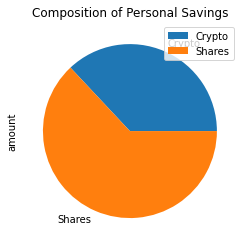

In [16]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto_value + total_shares_value

# Validate saving health
# YOUR CODE HERE!
if (total_savings > emergency_fund):
    print("Congratulations you have enough money in the fund")
elif (total_savings == emergency_fund):
    print("Congratulations on reaching the financial goal")
else:
    print(f"You are ${emergency_fund - total_savings} away from reaching the goal")

Congratulations you have enough money in the fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-07-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
timeframe = "1D" 
#df_stock_data = alpaca.get_bars(
    #tickers,
    #timeframe,
    #start=start_date,
    #end=end_date,
    #limit=1000
#).df

#AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
#SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop('symbol', axis=1)

# Display sample data
#df_all = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])
#df_all.head()

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start,
    end
).df

AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop('symbol', axis=1)

df_all = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])
df_all.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2022-07-01 04:00:00+00:00  102.21  102.7874  102.0900  102.34  7274799   
2022-07-05 04:00:00+00:00  102.54  102.7043  102.3465  102.53  6813031   
2022-07-06 04:00:00+00:00  102.78  102.8000  101.8400  101.84  6644945   
2022-07-07 04:00:00+00:00  101.94  101.9799  101.5200  101.61  8220620   
2022-07-08 04:00:00+00:00  101.35  101.4499  101.1600  101.23  5269814   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-07-01 04:00:00+00:00       26198  102.348326  376.60  381.70  373.800   
2022-07-05 04:00:00+00:00       27463  102.550763  376.00  381.98  372.900   
2022-07-06 04:00:00+00:00       26799  102.118683  382.07  385.87  379.600   
2022-07-07 04:00:00+00:00       17966  101.626894  385.12  389.83  383.267   
2022-07-08 04:00:00+00:00       19181  101.268556  387.16  390.64  385.660   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-01 04:00:00+00:00  381.24  74165514      601221  378.221516  
2022-07-05 04:00:00+00:00  381.96  79887221      645359  377.447552  
2022-07-06 04:00:00+00:00  383.25  69844126      614420  382.508286  
2022-07-07 04:00:00+00:00  388.99  64172156      467708  387.621834  
2022-07-08 04:00:00+00:00  388.67  72468892      509776  388.661805

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist=MCSimulation(
    portfolio_data = df_all,
    weights=[.40,.60],
    num_simulation = 500,
    num_trading_days= 252*30,
)

In [21]:
# Printing the simulation input data
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\pogol\HW\2. Financial Planner (5)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
1,1.004222e+00,9.925758e-01,9.854036e-01,1.000440e+00,0.993944,9.985620e-01,1.006867,0.997211,1.002436e+00,1.006125e+00,...,1.000351e+00,1.008657e+00,1.007817e+00,9.910804e-01,1.008459e+00,0.997934,9.944268e-01,1.001787e+00,1.013170e+00,0.998730
2,9.920979e-01,1.006408e+00,9.869770e-01,9.998058e-01,0.989047,1.014148e+00,1.008142,1.005469,9.989537e-01,9.911740e-01,...,1.016894e+00,1.036536e+00,1.014435e+00,9.898222e-01,1.007842e+00,0.998060,9.935268e-01,1.006027e+00,1.012802e+00,0.997177
3,9.916086e-01,1.016288e+00,9.842715e-01,9.931889e-01,0.992233,1.014380e+00,1.004094,1.013972,1.004761e+00,9.870991e-01,...,1.013789e+00,1.033751e+00,1.019720e+00,1.000509e+00,1.012779e+00,0.986574,9.922276e-01,1.007448e+00,1.007462e+00,0.995490
4,1.001444e+00,1.017247e+00,9.930117e-01,9.988537e-01,0.992503,1.004001e+00,1.008095,1.009289,1.012352e+00,9.801525e-01,...,1.023312e+00,1.041663e+00,1.019670e+00,1.000393e+00,1.015855e+00,0.991578,9.945599e-01,1.015191e+00,1.003360e+00,0.998627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.113038e+06,1.021129e+06,1.635528e+06,1.061833e+06,424998.222579,1.476518e+06,812713.590254,796512.464445,2.573457e+06,1.493893e+06,...,1.335168e+06,1.553899e+06,1.099981e+06,1.825306e+06,1.186935e+06,713947.992066,1.899838e+06,2.892762e+06,2.704350e+06,563224.254695
7557,2.106894e+06,1.027962e+06,1.645172e+06,1.076414e+06,421244.007045,1.486264e+06,817285.356414,798227.842824,2.616125e+06,1.517686e+06,...,1.343722e+06,1.583040e+06,1.090274e+06,1.806272e+06,1.193477e+06,723417.639521,1.902993e+06,2.849018e+06,2.693262e+06,564334.476033
7558,2.140856e+06,1.031799e+06,1.660720e+06,1.069474e+06,425461.967526,1.492060e+06,820415.646590,796593.368369,2.644024e+06,1.521632e+06,...,1.351177e+06,1.578686e+06,1.092574e+06,1.798891e+06,1.187480e+06,735184.347187,1.881270e+06,2.854991e+06,2.644704e+06,566524.187824
7559,2.139766e+06,1.043202e+06,1.655129e+06,1.052241e+06,420661.948233,1.479867e+06,825971.806095,809171.216796,2.639186e+06,1.499937e+06,...,1.344176e+06,1.586084e+06,1.099629e+06,1.795951e+06,1.179814e+06,736045.665601,1.879646e+06,2.849521e+06,2.658871e+06,564331.670991


In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\pogol\HW\2. Financial Planner (5)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000
1,9.997531e-01,9.997214e-01,1.004124e+00,9.892036e-01,0.997142,1.004779e+00,1.010615e+00,1.000933e+00,1.005114,0.998657,...,1.001591,0.996948,9.966744e-01,1.009345,1.003067,1.000395e+00,1.005525,0.991509,1.011125e+00,0.997389
2,9.971670e-01,1.008486e+00,1.003674e+00,9.907485e-01,1.006960,1.003923e+00,1.018107e+00,9.968069e-01,1.005448,0.994167,...,1.007070,1.007849,1.007161e+00,1.020525,0.995034,1.002443e+00,1.001358,0.977430,1.010940e+00,0.987129
3,9.997327e-01,1.021353e+00,1.015096e+00,9.937230e-01,1.011498,1.007943e+00,1.039167e+00,1.012240e+00,1.008560,0.986487,...,1.010030,1.009964,1.008432e+00,1.016402,0.997958,9.994940e-01,1.002815,0.982367,1.023198e+00,0.996698
4,9.954309e-01,1.026215e+00,1.016864e+00,1.000571e+00,1.015797,1.006851e+00,1.041179e+00,1.011149e+00,1.007743,0.975231,...,1.002902,1.012113,1.007099e+00,1.026026,1.004547,9.923741e-01,1.003406,0.995109,1.029660e+00,0.994653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.653779e+06,2.449050e+06,1.111212e+06,1.378519e+06,668926.981602,1.155739e+06,1.171921e+06,2.531110e+06,274795.662237,690463.067540,...,431564.143561,650026.834259,2.225409e+06,945119.213161,853983.453014,2.851878e+06,680153.552124,331848.733147,1.789502e+06,556757.601648
7557,1.647763e+06,2.433340e+06,1.103578e+06,1.381824e+06,673442.128986,1.151969e+06,1.161329e+06,2.537703e+06,270773.190456,691956.954767,...,432952.536514,654218.289032,2.264271e+06,945559.205569,862910.926245,2.885157e+06,679134.283100,332738.463502,1.786109e+06,555225.032914
7558,1.641542e+06,2.448514e+06,1.103533e+06,1.377245e+06,673166.716321,1.147863e+06,1.152021e+06,2.510267e+06,271869.676304,683473.252716,...,432575.619976,661228.068206,2.276945e+06,947839.567005,868909.680501,2.886708e+06,681396.827942,335732.574410,1.778755e+06,561137.750449
7559,1.653235e+06,2.406408e+06,1.108273e+06,1.370721e+06,680214.865811,1.145651e+06,1.148994e+06,2.502932e+06,268849.187307,686368.308965,...,432487.834390,656267.636607,2.296029e+06,952437.237546,881511.641422,2.871959e+06,677502.422342,340331.204450,1.793028e+06,558127.595227


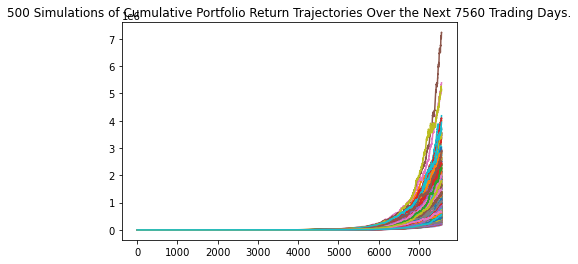

In [23]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

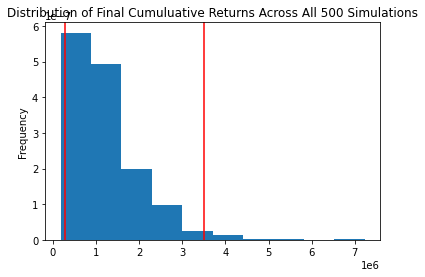

In [24]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           5.000000e+02
mean            1.231691e+06
std             8.389132e+05
min             1.771843e+05
25%             6.749762e+05
50%             1.023251e+06
75%             1.557120e+06
max             7.232932e+06
95% CI Lower    2.810188e+05
95% CI Upper    3.495157e+06
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $5620375338.13 and $69903144136.1


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $8430563007.2 and $104854716204.15


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")